<a href="https://colab.research.google.com/github/rafaelbragae/Inteligencia_Artificial/blob/main/Trabalho_final__parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import cv2
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import os
from distutils.dir_util import copy_tree, remove_tree

from keras.utils.np_utils import to_categorical
from keras.losses import CategoricalCrossentropy
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.utils import plot_model
import tensorflow as tf

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/Data_trabalho_final/Alzheimer_Image/train/"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Data_trabalho_final/Alzheimer_Image/test/"

In [ ]:
def visualize(direction):
    list_dir=os.listdir(direction)
    plt.figure(figsize=(14,8))
    for i in range(1,7):
        plt.subplot(2,3,i)
        img= plt.imread(os.path.join(direction,list_dir[i]))
        plt.imshow(img,cmap='gray')
        plt.axis('off')
    plt.tight_layout()

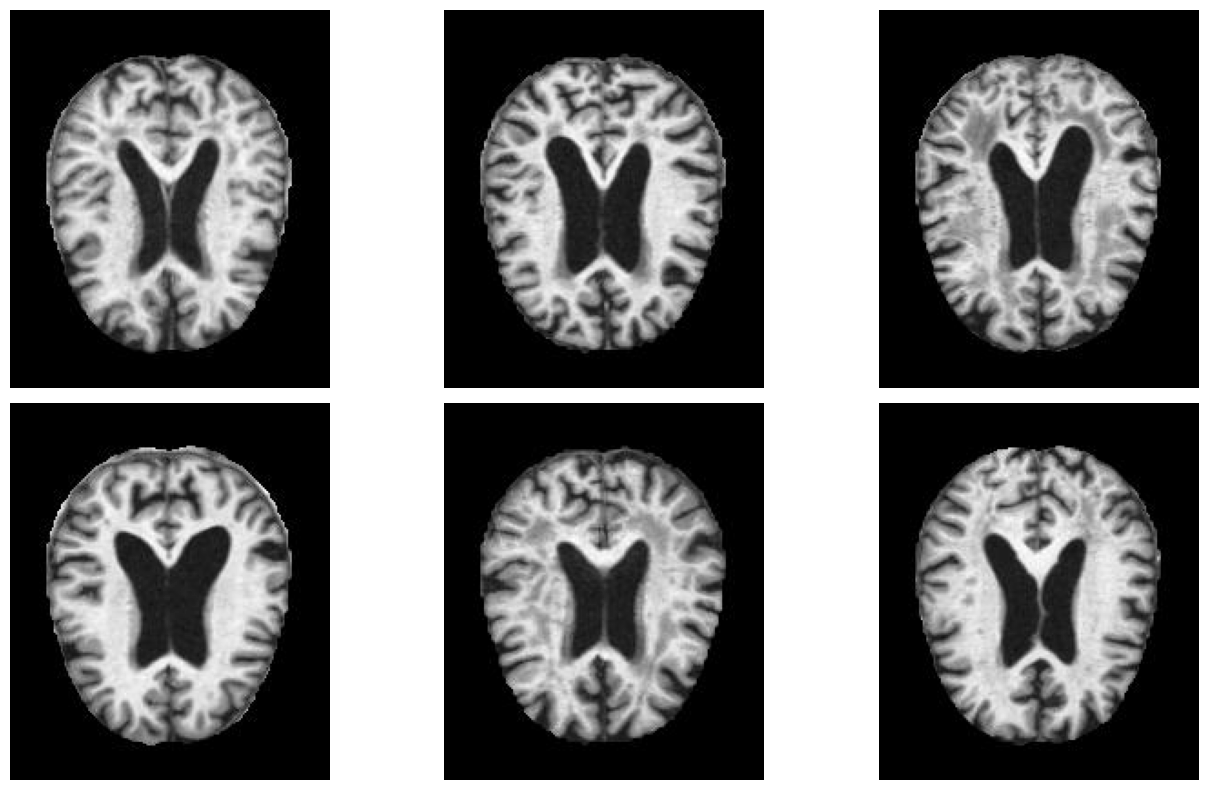

In [ ]:
ModerateDemented_dir= '/content/drive/MyDrive/Colab Notebooks/Data_trabalho_final/Alzheimer_Image/test/MildDemented'
visualize(ModerateDemented_dir)

In [ ]:
data = []

for dirtrain in os.listdir(train_dir):
    print(dirtrain)
    for tr in os.listdir(train_dir + dirtrain):
        img = cv2.imread(train_dir + dirtrain + "/" + tr)
        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img.reshape(32, 32, 1)

        data.append([img, dirtrain])

VeryMildDemented
MildDemented
NonDemented
ModerateDemented


In [ ]:
for dirtest in  os.listdir(test_dir):
    print(dirtest)
    for ts in os.listdir(test_dir + dirtest):
        img = cv2.imread(test_dir + dirtest + "/" + ts)
        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img.reshape(32, 32, 1)

        data.append([img, dirtest])

NonDemented
VeryMildDemented
MildDemented
ModerateDemented


In [ ]:
print(data[0][1])
print(data[3][1])

VeryMildDemented
VeryMildDemented


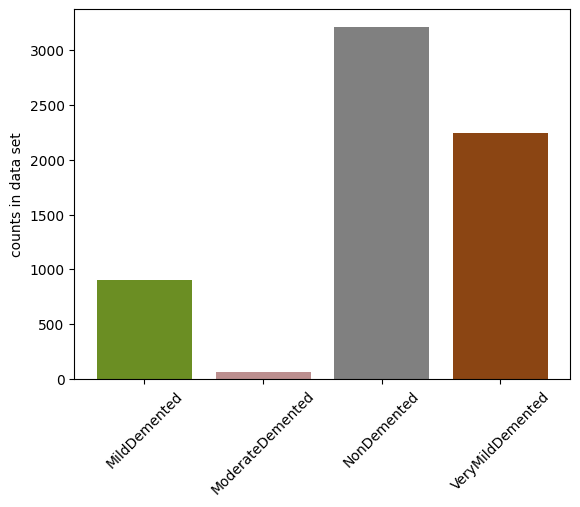

In [ ]:
label = []

for i in range(0, len(data)):
  label.append(data[i][1])

unique, counts = np.unique(label, return_counts=True)
colors=['olivedrab', 'rosybrown', 'gray', 'saddlebrown']
plt.bar(unique,counts,color=colors)
plt.ylabel(f"counts in data set")
plt.xticks(np.arange(len(unique)))
plt.xticks(rotation = 45)

plt.show()

In [ ]:
import random
random.Random(4).shuffle(data)

In [ ]:
x, y = [], []
for e in data:
    x.append(e[0])
    y.append(e[1])

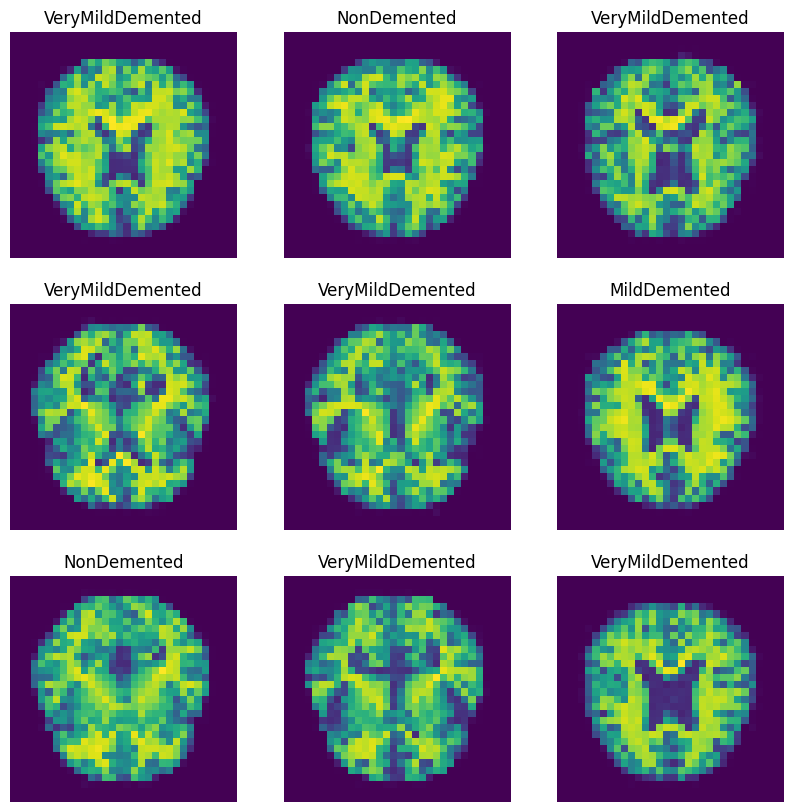

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(x[i])
  plt.title(y[i])
  plt.axis("off")

In [ ]:
X = np.array(x)
Y = np.asarray(y)
hot = LabelEncoder()
y_encoded = hot.fit_transform(Y)
Y=to_categorical(y_encoded)
X=X/255
print(X.shape)
print(Y.shape)

(6420, 32, 32, 1)
(6420, 4)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

<hr></hr>

# **CNN**

<hr></hr>

In [ ]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=(32, 32, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('sigmoid'))

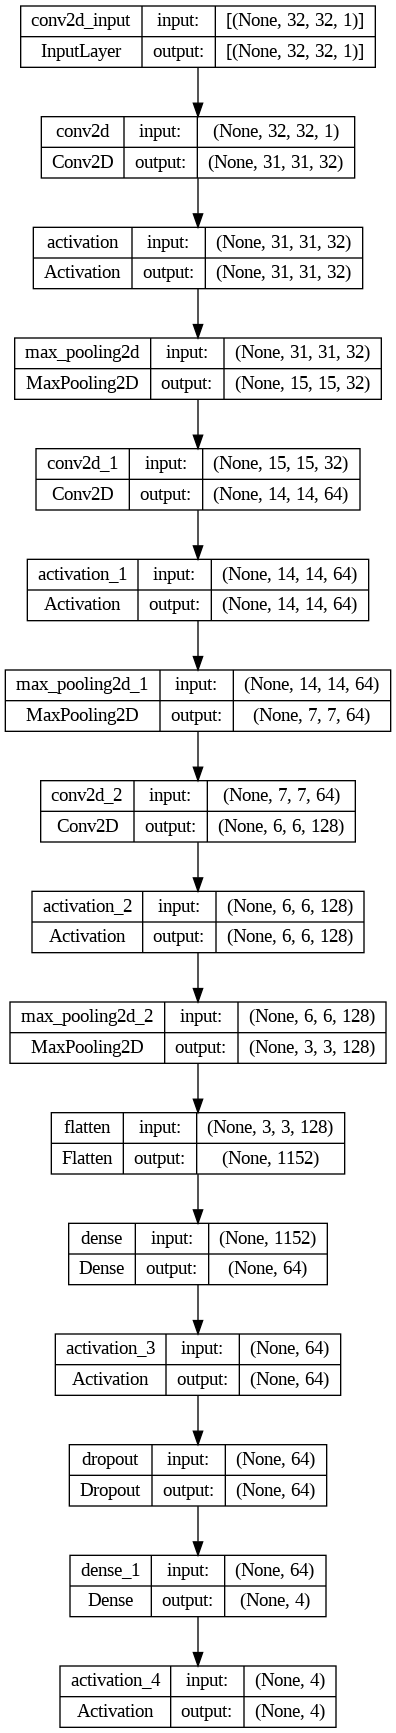

In [ ]:
plot_model(model, to_file='model.png',show_shapes= True , show_layer_names=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = "Adam", metrics = ['accuracy', tf.keras.metrics.AUC(name='auc')])

In [ ]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs = 120, batch_size=64)

Epoch 1/120
73/73 [==============================] - 10s 112ms/step - loss: 1.0842 - accuracy: 0.4844 - auc: 0.7643 - val_loss: 1.0917 - val_accuracy: 0.4455 - val_auc: 0.7686
Epoch 2/120
73/73 [==============================] - 5s 74ms/step - loss: 1.0068 - accuracy: 0.5110 - auc: 0.7820 - val_loss: 0.9969 - val_accuracy: 0.4864 - val_auc: 0.7824
Epoch 3/120
73/73 [==============================] - 6s 87ms/step - loss: 0.9410 - accuracy: 0.5398 - auc: 0.8035 - val_loss: 0.9698 - val_accuracy: 0.4825 - val_auc: 0.7831
Epoch 4/120
73/73 [==============================] - 7s 89ms/step - loss: 0.9492 - accuracy: 0.5515 - auc: 0.7987 - val_loss: 0.9977 - val_accuracy: 0.4903 - val_auc: 0.7844
Epoch 5/120
73/73 [==============================] - 5s 74ms/step - loss: 0.9146 - accuracy: 0.5640 - auc: 0.8082 - val_loss: 0.9855 - val_accuracy: 0.4903 - val_auc: 0.7862
Epoch 6/120
73/73 [==============================] - 8s 105ms/step - loss: 0.9063 - accuracy: 0.5640 - auc: 0.8092 - val_loss: 1

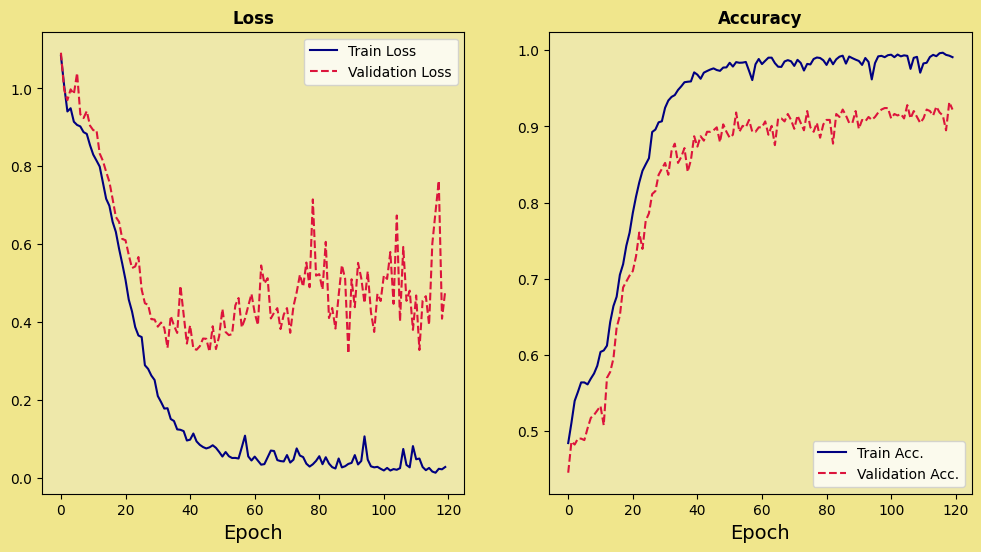

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,6), facecolor="khaki")
ax[0].set_facecolor('palegoldenrod')
ax[0].set_title('Loss', fontweight="bold")
ax[0].set_xlabel("Epoch", size=14)
ax[0].plot(history.epoch, history.history["loss"], label="Train Loss", color="navy")
ax[0].plot(history.epoch, history.history["val_loss"], label="Validation Loss", color="crimson", linestyle="dashed")
ax[0].legend()
ax[1].set_facecolor('palegoldenrod')
ax[1].set_title('Accuracy', fontweight="bold")
ax[1].set_xlabel("Epoch", size=14)
ax[1].plot(history.epoch, history.history["accuracy"], label="Train Acc.", color="navy")
ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation Acc.", color="crimson", linestyle="dashed")
ax[1].legend()

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [ ]:
Y_test_cnn = Y_test.argmax(axis=1)
Y_test_cnn

array([2, 2, 3, ..., 3, 2, 2])

In [ ]:
y_pred = model.predict(X_test).argmax(axis=1)

41/41 [==============================] - 1s 12ms/step


In [ ]:
y_pred

array([2, 2, 3, ..., 3, 2, 2])

In [ ]:
from sklearn.metrics import f1_score
# Calculando o F1-Score multiclasse
f1 = f1_score(Y_test_cnn, y_pred, average='macro')
print("F1-Score Multiclasse:", f1)

F1-Score Multiclasse: 0.8764313302353437


In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)
print('Test AUC:', score[2]*100)

Test loss: 0.4370690584182739
Test accuracy: 92.83488988876343
Test AUC: 96.32080793380737


<Axes: >

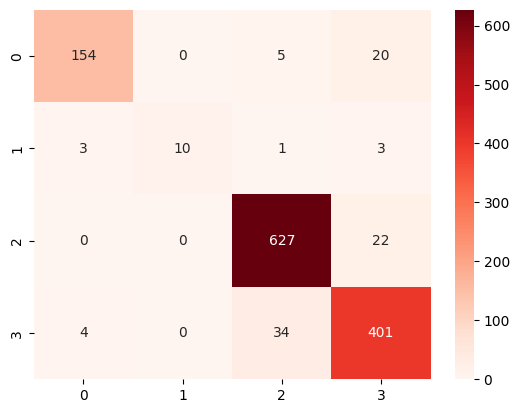

In [ ]:
mc = pd.DataFrame(
  data = confusion_matrix(Y_test_cnn, y_pred),
  columns = ['0', '1', '2', '3'],
  index = ['0', '1', '2', '3']
)
sns.heatmap(mc, cmap="Reds", annot=True, fmt='.0f')

<hr></hr>

# **Random Forest**

<hr></hr>

In [ ]:
lenofimage = len(x)

In [ ]:
X = np.array(x).reshape(lenofimage,-1)

In [ ]:
X.shape

(6420, 1024)

In [ ]:
X = X/255.0
X[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y=np.array(y)
y.shape

(6420,)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
n_estimators = list(range(5,50))
max_features = ['sqrt']
max_depth = [int(x) for x in np.linspace(10, 60, num = 12)]
min_samples_split = list(range(2,11))
min_samples_leaf = list(range(1,10))
bootstrap = [True, False]

In [ ]:
forest_params = [{'n_estimators': n_estimators,

    'max_features': max_features,

    'max_depth': max_depth,

    'min_samples_split': min_samples_split,

    'min_samples_leaf': min_samples_leaf,

    'bootstrap': bootstrap}]

cv = KFold(n_splits=5)
rfc = RandomForestClassifier()

In [ ]:
forest = RandomizedSearchCV(rfc, forest_params, cv = cv, verbose = -1)
forest = forest.fit(x_train, y_train)

In [ ]:
test_predictions = forest.predict(x_test)

In [ ]:
# Calculando o F1-Score multiclasse
f1 = f1_score(y_test, test_predictions, average='macro')
print("F1-Score Multiclasse:", f1)

F1-Score Multiclasse: 0.8192022493008017


In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.2f}".format(precision))

Accuracy with RandomForest: 92.52


<hr></hr>

# **SVM**

<hr></hr>

In [ ]:
# Importando a biblioteca do SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
svc = SVC(kernel='linear',gamma=1,C=1)
svc.fit(x_train, y_train)

SVC(C=1, gamma=1, kernel='linear')

In [ ]:
pred_svm = svc.predict(x_test)

In [ ]:
# Calculando o F1-Score multiclasse
f1 = f1_score(y_test, pred_svm, average='macro')
print("F1-Score Multiclasse:", f1)

F1-Score Multiclasse: 0.8641174813388787


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,pred_svm)*100
print("Accuracy SVM is",acc)

Accuracy SVM is 82.71028037383178


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_svm))

                  precision    recall  f1-score   support

    MildDemented       0.78      0.88      0.83       178
ModerateDemented       1.00      1.00      1.00        14
     NonDemented       0.86      0.86      0.86       663
VeryMildDemented       0.79      0.75      0.77       429

        accuracy                           0.83      1284
       macro avg       0.86      0.87      0.86      1284
    weighted avg       0.83      0.83      0.83      1284



<hr></hr>

# ***Comparação dos modelos***

<hr></hr>

In [ ]:
# Dados fictícios de acurácia para diferentes modelos
acuracia = {'CNN': score[1]*100,
            'Random Forest': precision,
            'SVM': acc}

# Criar um DataFrame para armazenar os resultados
df = pd.DataFrame.from_dict(acuracia, orient='index', columns=['Acurácia'])

# Classificar os modelos em ordem decrescente de acurácia
df = df.sort_values(by='Acurácia', ascending=False)

# Imprimir a tabela de resultados
print(df)

                Acurácia
CNN            92.834890
Random Forest  92.523364
SVM            82.710280


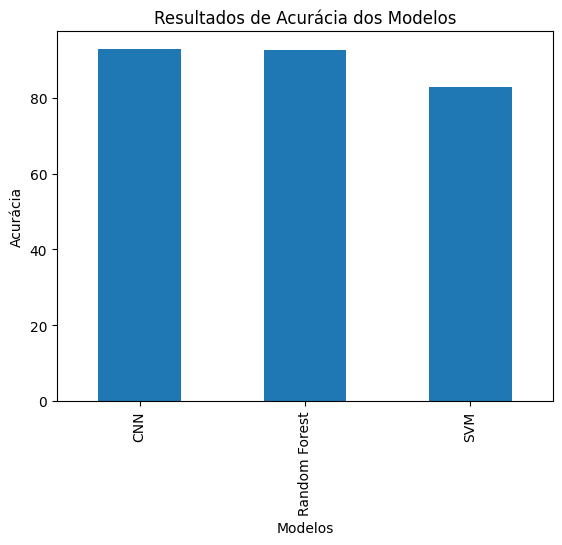

In [ ]:
acuracia = {'CNN': score[1]*100,
            'Random Forest': precision,
            'SVM': acc}

# Criar um DataFrame para armazenar os resultados
df = pd.DataFrame.from_dict(acuracia, orient='index', columns=['Acurácia'])

# Classificar os modelos em ordem decrescente de acurácia
df = df.sort_values(by='Acurácia', ascending=False)

# Plotar o gráfico de barras
df.plot(kind='bar', legend=False)
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Resultados de Acurácia dos Modelos')
plt.show()